# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [61]:
# import libraries
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json

In [62]:
# extract all contents from zip file
with zipfile.ZipFile('tweet-json.zip', 'r') as myzip:
    myzip.extractall()

In [63]:
# load data from csv file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [64]:
# programmatically download tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [65]:
# load data into dataframe and check
df_images = pd.read_csv('image_predictions.tsv', sep='\t')
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

* I am using the alternative twitter method provided by Udacity

In [66]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

#Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    # for tweet_id in tweet_ids:
        # count += 1
        # print(str(count) + ": " + str(tweet_id))
        # try:
            # tweet = api.get_status(tweet_id, tweet_mode='extended')
            # print("Success")
            # json.dump(tweet._json, outfile)
            # outfile.write('\n')
        # except tweepy.TweepError as e:
            # print("Fail")
            # fails_dict[tweet_id] = e
            # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [67]:
# alternate twitter method
df_json = []
with open('tweet_json.txt') as file:
    lines = file.readlines()
    for line in lines:
        parsed = json.loads(line)
        df_json.append({'tweet_id':parsed['id_str'],
                        'retweet_count':parsed['retweet_count'],
                        'favorite_count':parsed['favorite_count']})
    
twitter_counts = pd.DataFrame(df_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])       

twitter_counts.head()    

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment
I have overviews of the 3 datasets, for visual assessment. From looking at these, it looks like there are some incorrect datatypes, potentially missing data, and columns that won't be needed.

In [68]:
df_archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [69]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [70]:
df_images.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [71]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
twitter_counts.head(15)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [73]:
twitter_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


###  Programmatic Assessement

Right away we can see some issues that need to be fixed. First, all of the tweet_id's should be the same data type for all 3 dataframes. The timestamp column should be changed to datetime format, rather than a string. Also, the different dog type columns should be changed into a single column.

In [74]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [75]:
# check for duplicates
df_archive.duplicated().sum()

0

In [76]:
# check names
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
an            7
Buddy         7
Toby          7
Daisy         7
Bailey        7
Dave          6
Oscar         6
Milo          6
Koda          6
Bella         6
Stanley       6
Rusty         6
Scout         6
Jack          6
Leo           6
Jax           6
Finn          5
           ... 
Fiji          1
Erik          1
Reptar        1
Ben           1
Pumpkin       1
Benny         1
Ferg          1
Rey           1
Jackie        1
Traviss       1
Darrel        1
his           1
Colin         1
Emma          1
Akumi         1
Crouton       1
Ralphie       1
Opie          1
Griswold      1
Timofy        1
Rhino         1
Sky           1
Heinrich      1
Tedrick       1
Banditt       1
Sonny         1
Ozzie         1
Monty         1
Sprout        1
Brownie       1
Name: name, Length: 957,

In [77]:
# assess df_image data types
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [78]:
# assess json_tweets data types
twitter_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [79]:
# check retweet values
twitter_counts['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

### Quality issues (completeness, validity, accuracy, & consistency )
**1.** tweet_id for df_archive and df_images should be converted to strings, to be consistent with the twitter_counts dataframe.

**2.** Remove retweets. 

**3.** Remove unnecessary columns from df_archive.

**4.** Timestamp column should be converted from object to datetime.

**5.** Change rating_numerator and rating_denominator data types to float, to allow decimals.

**6.** Change the naming convention of p1, p2, and p3 to be all lowercase, for consistency.

**7.** Change dog names labeled as "a" and "None" in the name column, to "NaN."

**8.** Change the multiple columns for dog breeds, predictions, and confidence levels into just 2 new columns for dog breed and prediction confidence. 


### Tidiness issues
**1.** Dog stages (doggo, floofer, pupper, and puppo) should be combined into a single column.

**2.** Merge dataframes into one master dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [80]:
# make copies of original data
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()
twitter_counts_clean = twitter_counts.copy()

### Quality Issue #1:

"tweet_id" for df_archive, df_images_clean, and twitter_counts_clean should all be string data types, since it is the identifier. So I will need to convert those columns in df_archive_clean and df_images_clean to to be the correct data type.

In [81]:
# convert to stings
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_images_clean['tweet_id'] = df_images_clean['tweet_id'].astype(str)

In [82]:
# test
df_archive_clean.info()
print('-'*60)
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Quality Issue #2:

I need to remove retweets, since I only want original tweets with images. In df_archive, it looks like there are 181 retweets. I will remove these by deleting where retweeted_status_id is not NaN.

In [83]:
# remove retweets
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean['retweeted_status_id'])]

In [84]:
# test
print(sum(df_archive_clean['retweeted_status_id'].value_counts()))

0


### Quality Issue #3: 

I will be removing unnecessary columns that are not needed for the analysis. I will do this by dropping all columns from df_archive_clean that won't be needed.

In [85]:
# drop columns
df_archive_clean = df_archive_clean.drop(['source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1)

In [86]:
# test
df_archive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Quality Issue #4:

The timestamp column is currently an object datatype, but it needs to be converted to datetime format.

In [87]:
# use to_datetime to change datatype
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

In [88]:
# test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


In [89]:
# test
df_archive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Quality Issue #5:

I am going to change the data types of rating_numerator and rating_denominator to float, for consistency and so that decimal values can be allowed.

In [90]:
# change datatypes to float
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype(float)

In [91]:
# test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 203.9+ KB


### Quality Issue #6:

Since it doesn't look like there is any consistency with the naming of p1, p2, and p3, I am going to change the naming convention of those columns in df_images_clean to be all lowercase. 

In [92]:
# change all letters to lowercase
df_images_clean['p1'] = df_images_clean['p1'].str.lower()
df_images_clean['p2'] = df_images_clean['p2'].str.lower()
df_images_clean['p3'] = df_images_clean['p3'].str.lower()

In [93]:
# test
df_images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Quality Issue #7:

Since there are 55 dogs with the name "a" in the name column, I am going to assume that those are incorrect names. There are also 745 dogs without a name, but labeled as "None." I am going to replace all of those values with NaN instead. 

In [94]:
# df = df.drop(df[df['product_name'] == 'Coca Cola'].index)
df_archive_clean = df_archive_clean.replace('a', 'None')
df_archive_clean = df_archive_clean.replace('None', np.nan)

In [95]:
df_archive_clean['name'].value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Lola          8
the           8
Winston       8
Sadie         8
Toby          7
Daisy         7
Bailey        6
Oscar         6
Jax           6
Koda          6
Bella         6
Bo            6
Stanley       6
an            6
Dave          5
Louis         5
Bentley       5
Leo           5
Milo          5
Rusty         5
Buddy         5
Chester       5
Scout         5
Gary          4
             ..
Buckley       1
Dwight        1
Tiger         1
Vixen         1
Monty         1
Sonny         1
Brian         1
Banditt       1
Chaz          1
Sprinkles     1
Alexander     1
Dewey         1
Rey           1
Butter        1
Traviss       1
his           1
Colin         1
Emma          1
Akumi         1
Crouton       1
Ralphie       1
Opie          1
Jackie        1
Griswold      1
Rhino         1
Sky           1
Heinrich      1
Tedrick       1
Levi          1
Brownie       1
Name: name, Length: 954,

### Tidiness Issue #1:

Dog stages (doggo, floofer, pupper, and puppo) should be combined into a single column, called "dog_stage."

In [96]:
# Combine columns into new column using pd.melt
df_archive_clean = pd.melt(df_archive_clean, ['tweet_id','timestamp','text','expanded_urls','rating_numerator',
                                              'rating_denominator','name'], var_name='dogs', value_name='dog_stage')

In [97]:
# Drop dogs column
df_archive_clean = df_archive_clean.drop('dogs', axis=1)

In [98]:
# test
df_archive_clean.info()
df_archive_clean.dog_stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 8 columns):
tweet_id              8700 non-null object
timestamp             8700 non-null datetime64[ns]
text                  8700 non-null object
expanded_urls         8468 non-null object
rating_numerator      8700 non-null float64
rating_denominator    8700 non-null float64
name                  5760 non-null object
dog_stage             356 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 543.8+ KB


pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_stage, dtype: int64

In [99]:
# Sort, and drop duplicates
df_archive_clean = df_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id',keep='first')

In [100]:
# test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 9 to 2174
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1440 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.9+ KB


### Quality Issue #8:

Since there are three columns for dog breeds, predictions, and confidence level, I will instead change those into 2 new columns for dog breed and prediction confidence. I will do this by using a function to get the first true prediction, then deleting the old columns and rows without pictures.


In [101]:
# create lists to store predictions
dog_breed = []
pred_confidence = []

# define function to get predictions
def dogs(i):
    if i['p1_dog'] == True:
        dog_breed.append(i['p1'])
        pred_confidence.append(i['p1_conf'])
    elif i['p2_dog'] == True:
        dog_breed.append(i['p2'])
        pred_confidence.append(i['p2_conf'])
    elif i['p3_dog'] == True:
        dog_breed.append(i['p3'])
        pred_confidence.append(i['p3_conf'])
    else:
        dog_breed.append(np.nan)
        pred_confidence.append(np.nan)
    
# create index
df_images = df_images_clean.apply(dogs, axis=1)

In [102]:
# create new columns for dog breeds and prediction confidence
df_images_clean['dog_breed'] = dog_breed
df_images_clean['pred_confidence'] = pred_confidence

In [103]:
# drop columns
df_images_clean = df_images_clean.drop(['p1','p2','p3','p1_dog','p2_dog','p3_dog','p1_conf','p2_conf','p3_conf'], axis=1)

In [104]:
# check data
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id           2075 non-null object
jpg_url            2075 non-null object
img_num            2075 non-null int64
dog_breed          1751 non-null object
pred_confidence    1751 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.1+ KB


In [105]:
# drop rows with NaN values 
df_images_clean.dropna(subset=['dog_breed', 'pred_confidence'], inplace=True)

In [106]:
#test
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id           1751 non-null object
jpg_url            1751 non-null object
img_num            1751 non-null int64
dog_breed          1751 non-null object
pred_confidence    1751 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 82.1+ KB


### Tidiness Issue #2:

I want to combine all 3 datasets into 1 master dataset, using an outer joing on the "tweet_id" column.

In [107]:
# make combined master dataset
twitter_archive_master = pd.merge(df_images_clean, df_archive_clean, on="tweet_id", how='left')
twitter_archive_master = pd.merge(twitter_archive_master, twitter_counts_clean, on="tweet_id", how='left')

In [108]:
# Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 14 columns):
tweet_id              1751 non-null object
jpg_url               1751 non-null object
img_num               1751 non-null int64
dog_breed             1751 non-null object
pred_confidence       1751 non-null float64
timestamp             1686 non-null datetime64[ns]
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null float64
rating_denominator    1686 non-null float64
name                  1221 non-null object
dog_stage             260 non-null object
retweet_count         1750 non-null float64
favorite_count        1750 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 205.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [109]:
# Save to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Does a dog being in a certain stage (puppo, pupper, floofer, doggo) get higher ratings?

2. What are the top 3 most common dog breeds?

3. Do the most common dog breeds recieve the highest number of retweets?

#### Visualization
I am going to plot a histogram to see see if puppies or dogs get higher ratings.

In [110]:
# make puppy and dog catagories
puppy = twitter_archive_master.query('dog_stage == "pupper" or dog_stage == "puppo"')
dog = twitter_archive_master.query('dog_stage == "floofer" or dog_stage == "doggo"')

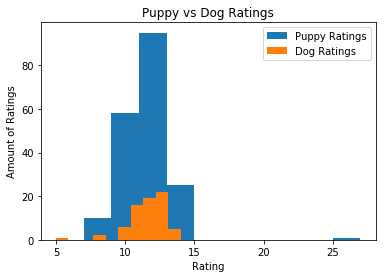

In [111]:
# create visualization of puppy vs. dog ratings
plt.hist(puppy['rating_numerator'], label='Puppy Ratings');
plt.hist(dog['rating_numerator'], label='Dog Ratings');
plt.legend()
plt.title('Puppy vs Dog Ratings')
plt.ylabel('Amount of Ratings')
plt.xlabel('Rating')
plt.show()

Based of of this histogram, it looks like puppies have a much higher number of ratings than dogs do. It also looks like puppies have slightly more varience in their score, with the dogs ratings appearing to be more closely grouped.

#### Insight #1

Baed on the graph above, it looks like puppies have higher ratings than dogs do. I am now going to compare the average ratings of all the individual dog stages, to see what group actually has the highest overall ratings.

In [112]:
# query dog stages
dog_pupper = twitter_archive_master.query('dog_stage == "pupper"')
dog_puppo = twitter_archive_master.query('dog_stage == "puppo"')
dog_floofer = twitter_archive_master.query('dog_stage == "floofer"')
dog_doggo = twitter_archive_master.query('dog_stage == "doggo"')

In [113]:
# Find mean of all ratings for dog stage
print(f"The mean for pupper rating is {np.mean(dog_pupper.rating_numerator)}")
print(f"The mean for puppo rating is {np.mean(dog_puppo.rating_numerator)}")
print(f"The mean for floofer rating is {np.mean(dog_floofer.rating_numerator)}")
print(f"The mean for doggo rating is {np.mean(dog_doggo.rating_numerator)}")

The mean for pupper rating is 10.958333333333334
The mean for puppo rating is 11.952380952380953
The mean for floofer rating is 12.0
The mean for doggo rating is 11.828125


After getting the mean values for each dog stage, it looks like floofer actually has the highest average rating, followed by puppo and then doggo. So based on these values, it looks like the "dog" catagory actually has higher average scores when just the ratings are compared individually.

#### Insight #2:
I am going to see what are the three most common dog breeds on WeRateDogs.

In [114]:
# Find top 3 dog breeds
twitter_archive_master['dog_breed'].value_counts()

golden_retriever                  173
labrador_retriever                113
pembroke                           96
chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
samoyed                            46
pomeranian                         42
cocker_spaniel                     34
malamute                           34
french_bulldog                     32
chesapeake_bay_retriever           31
miniature_pinscher                 26
cardigan                           23
eskimo_dog                         22
staffordshire_bullterrier          22
beagle                             21
german_shepherd                    21
siberian_husky                     20
shih-tzu                           20
rottweiler                         19
shetland_sheepdog                  19
kuvasz                             19
lakeland_terrier                   19
maltese_dog                        19
italian_grey

It looks like the most popular dog breed is the golden retriever, followed by the labrador retriever and pembroke.

#### Insight #3
I am going to check if the dog breeds with the highest rating numerators also have the highest retweet counts.

In [115]:
# group dogs by breed count
dog_breeds = twitter_archive_master.groupby('dog_breed').count()

# group by rating and retweet count
dog_ratings = dog_breeds['rating_numerator']
dog_retweets = dog_breeds['retweet_count']

In [116]:
# get breed values
dog_ratings.sort_values(ascending=False)

dog_breed
golden_retriever                  158
labrador_retriever                108
pembroke                           95
chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
pomeranian                         42
samoyed                            42
malamute                           33
french_bulldog                     31
chesapeake_bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 25
eskimo_dog                         22
german_shepherd                    21
staffordshire_bullterrier          21
cardigan                           21
beagle                             20
siberian_husky                     20
shih-tzu                           20
maltese_dog                        19
shetland_sheepdog                  19
rottweiler                         19
lakeland_terrier                   18
kuvasz                             18
it

In [117]:
# get retweet values
dog_retweets.sort_values(ascending=False)

dog_breed
golden_retriever                  173
labrador_retriever                113
chihuahua                          95
pembroke                           95
pug                                65
toy_poodle                         52
chow                               51
samoyed                            46
pomeranian                         42
malamute                           34
cocker_spaniel                     34
french_bulldog                     32
chesapeake_bay_retriever           31
miniature_pinscher                 26
cardigan                           23
staffordshire_bullterrier          22
eskimo_dog                         22
german_shepherd                    21
beagle                             21
siberian_husky                     20
shih-tzu                           20
maltese_dog                        19
lakeland_terrier                   19
rottweiler                         19
kuvasz                             19
shetland_sheepdog                  19
it

From this data, it looks like golden retrievers are both the highest rated and most retweeted dog breed on WeRateDogs, followed by the labrador retriever. For third place, the highest rated breed is the pemproke. However, third highest retweeted breed is tied between the pembroke and chihuahua.

### References
* https://pandas.pydata.org/docs/reference/
* https://pypi.org/project/requests/
* https://stackoverflow.com/questions/53645882/pandas-merging-101
* https://www.geeksforgeeks.org/